# HR Anaytics -  Employee Attrition & Peformance

I took the IBM HR Analytics dataset from Kaggle. This is a fictional dataset created by IBM Scientists. In this project, I will be using python to do analysis around reasons for employee attrition. I will be applying all my learnings from the course: [Data Analysis with Python: Zero to Pandas](zerotopandas.com). 

This course is an excellent pathway for all the data science aspirants. What distingushes this course from any other data analytics course is the course structure. Here, you dont just listen but you get hands-on practice as well. Thankful to Aakash Sir for launching this course. Looking forward to learn more from this team.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Downloading the Dataset

> - Got the IBM HR Analytics dataset in csv format from : https://www.kaggle.com/datasets?fileType=csv
> - Downloaded the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [46]:
emp_df= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Data Preparation and Cleaning

> - Reading the csv file and doing initial statistical analysis (shape,values etc)
> - Data Preprocessing: Reading the uniques values for each column and removing those which wont be significant in the analysis further.
> - Create new dataframe to proceed with the analysis further.



In [47]:
emp_df.head(50)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [7]:
emp_df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
emp_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Here, we are counting the number of unique values of all the columns. This helped us decide that the following columns: EmployeeCount','StandardHours','EmployeeNumber','Over18 can be removed from the final data frame.
Employee Number doesnt have any impact in anaysis as its a unique key for each record. Employee Count, Standard Hours and Over18 doesn't have enough data to do the analysis.

In [48]:
for i in emp_df:
    print("No of Values for {} is {}".format(i,str(emp_df[i].nunique())))

No of Values for Age is 43
No of Values for Attrition is 2
No of Values for BusinessTravel is 3
No of Values for DailyRate is 886
No of Values for Department is 3
No of Values for DistanceFromHome is 29
No of Values for Education is 5
No of Values for EducationField is 6
No of Values for EmployeeCount is 1
No of Values for EmployeeNumber is 1470
No of Values for EnvironmentSatisfaction is 4
No of Values for Gender is 2
No of Values for HourlyRate is 71
No of Values for JobInvolvement is 4
No of Values for JobLevel is 5
No of Values for JobRole is 9
No of Values for JobSatisfaction is 4
No of Values for MaritalStatus is 3
No of Values for MonthlyIncome is 1349
No of Values for MonthlyRate is 1427
No of Values for NumCompaniesWorked is 10
No of Values for Over18 is 1
No of Values for OverTime is 2
No of Values for PercentSalaryHike is 15
No of Values for PerformanceRating is 2
No of Values for RelationshipSatisfaction is 4
No of Values for StandardHours is 1
No of Values for StockOptionL

In [49]:
emp_new_df=emp_df.copy()
emp_new_df.drop(['EmployeeCount','StandardHours','EmployeeNumber','Over18'],axis="columns",inplace=True)

In [50]:
emp_new_df.shape

(1470, 31)

## Exploratory Analysis and Visualization

> - Find patterns of data through visualization and reveal the hidden trends from data.
> - Using both matplotlib abd seaborn library to visualize the data
> - Finding relationships between features using bar graphs, histograms,boxplots, heatmap etc
> - Analysing both the numerical and the categorial columns separately

In [51]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Visualizing all the columns which are integer datatype and has unique values less than 30. We will be creating a new array with only these features and then visualize it all together. This step has helped us optimize our process and limit manual effort, as we are not looking at each of the columns manually. 
PS: I have taken 30 , just as an estimated number.

In [52]:
num_col=[]
for i in emp_new_df.columns:
    if(emp_new_df[i].dtypes!=object and emp_new_df[i].nunique()<30):
        print(i, emp_new_df[i].unique())
        num_col.append(i)
#print(num_col)

DistanceFromHome [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education [2 1 4 3 5]
EnvironmentSatisfaction [2 3 4 1]
JobInvolvement [3 2 4 1]
JobLevel [2 1 3 4 5]
JobSatisfaction [4 2 3 1]
NumCompaniesWorked [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating [3 4]
RelationshipSatisfaction [1 4 2 3]
StockOptionLevel [0 1 3 2]
TrainingTimesLastYear [0 3 2 5 1 4 6]
WorkLifeBalance [1 3 2 4]
YearsInCurrentRole [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


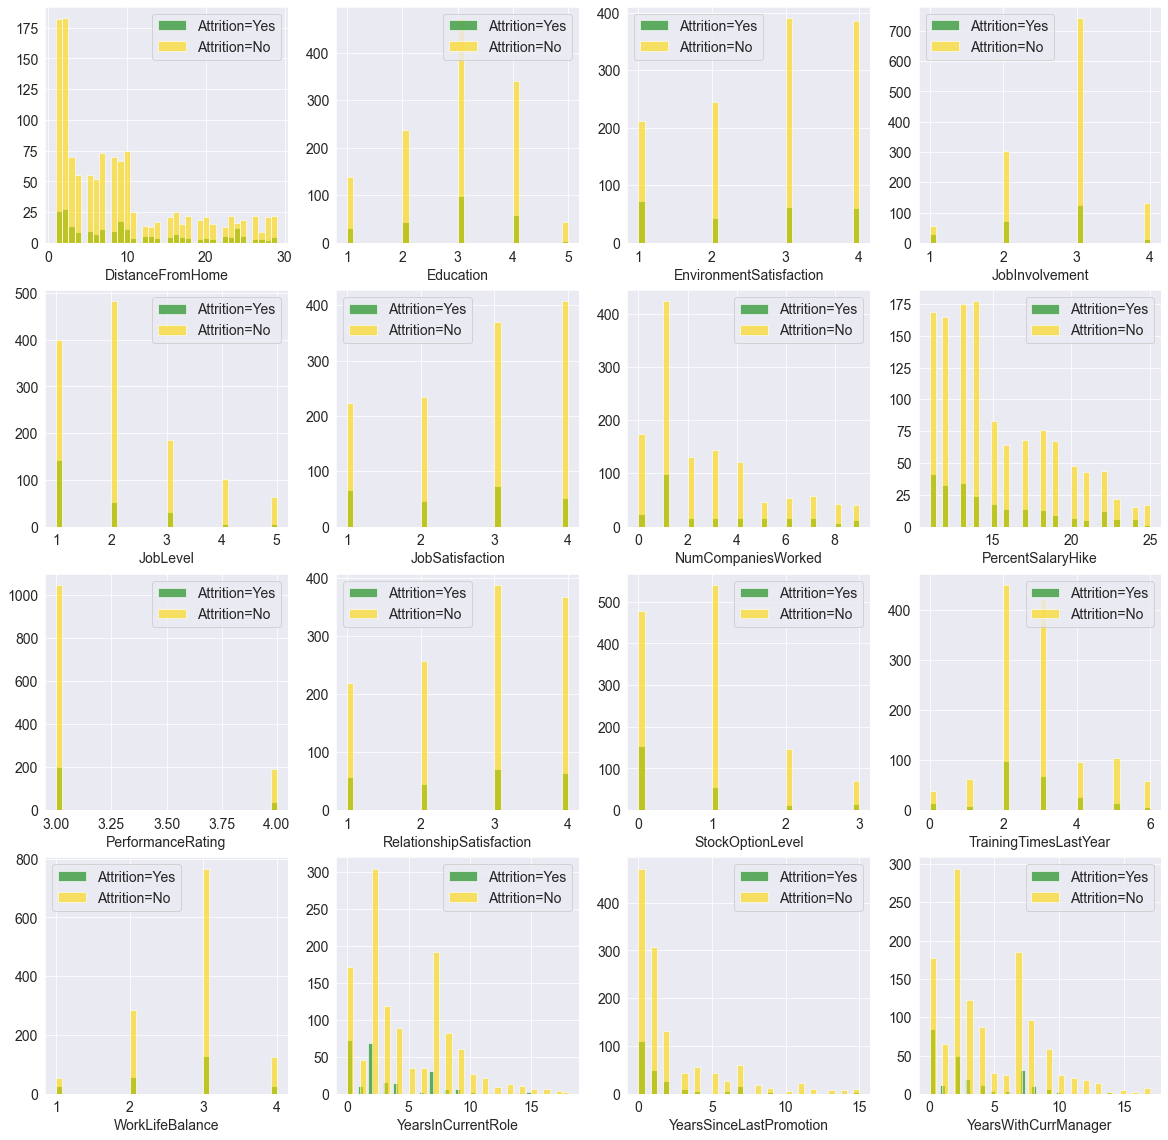

In [53]:
plt.figure(figsize=(20,20))
for i, column in enumerate(num_col,1):
    plt.subplot(4,4,i)
    emp_new_df[emp_new_df['Attrition']=='Yes'][column].hist(bins=36,color='green',label="Attrition=Yes",alpha=0.6)
    emp_new_df[emp_new_df['Attrition']=='No'][column].hist(bins=36,color='gold',label="Attrition=No",alpha=0.6)
    plt.xlabel(column)
    plt.legend()

As we can see, environment satisfaction, job satisfaction, performance rating and relationship satisfactions don't have much impact on the attrition of employees. While percentage salary hike, years since last promotion, Job Level etc have an impact on attrition. We will study it in detail later in this notebook.

Same as done above, now we are visualizing all the columns which are of object datatype and has unique values less than 30. We will be creating a new array with only these features and then visualize it all together.

In [54]:
cat_col=[]
for i in emp_new_df.columns:
    if(emp_new_df[i].dtypes==object and emp_new_df[i].nunique()<30):
        print(i, emp_new_df[i].unique())
        cat_col.append(i)

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
OverTime ['Yes' 'No']


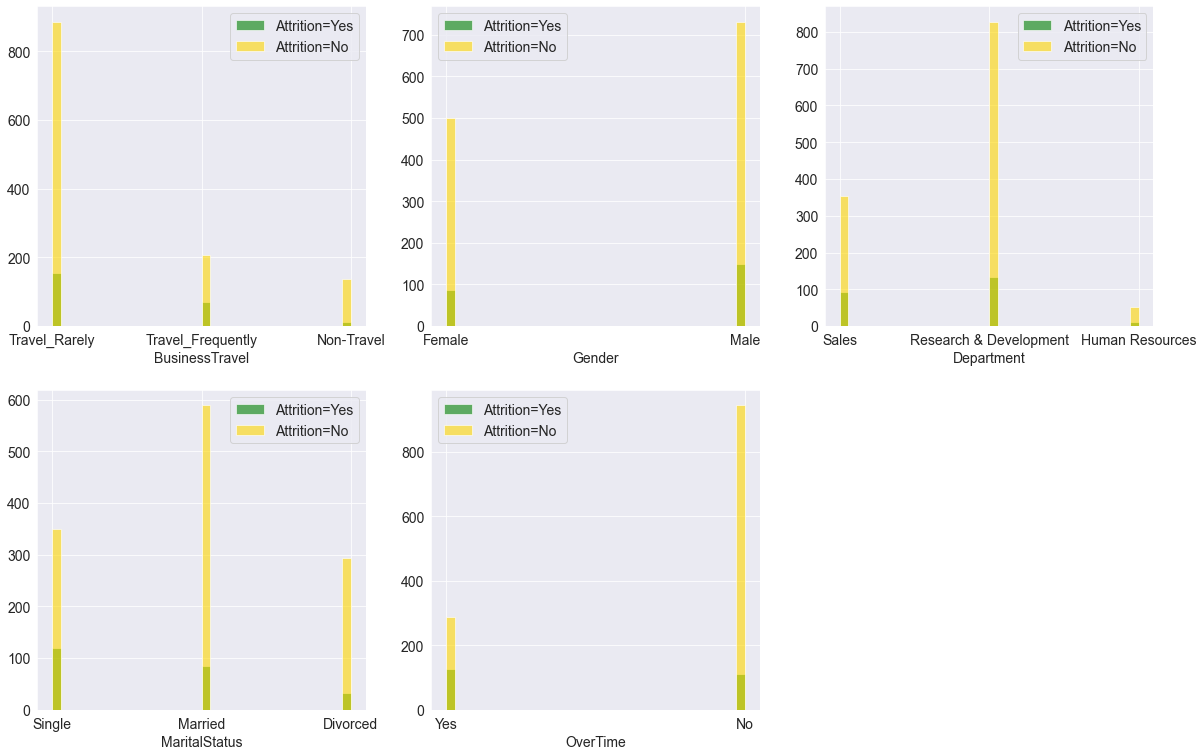

In [55]:
plt.figure(figsize=(20,20))
cat_col_new= ['BusinessTravel','Gender','Department','MaritalStatus','OverTime']
for i, column in enumerate(cat_col_new,1):
    plt.subplot(3,3,i)
    emp_new_df[emp_new_df['Attrition']=='Yes'][column].hist(bins=36,color='green',label="Attrition=Yes",alpha=0.6)
    emp_new_df[emp_new_df['Attrition']=='No'][column].hist(bins=36,color='gold',label="Attrition=No",alpha=0.6)
    plt.xlabel(column)
    plt.legend()

All the dimensions shown above seems to have an impact on attrition. OverTime graph clearly shows that associates who do over time have higher attrition rate. Similar observation can be made from Marital Status, it shows single employees have higher attrition rate. We will study the other dimensions in this notebook. Let's go ahead.

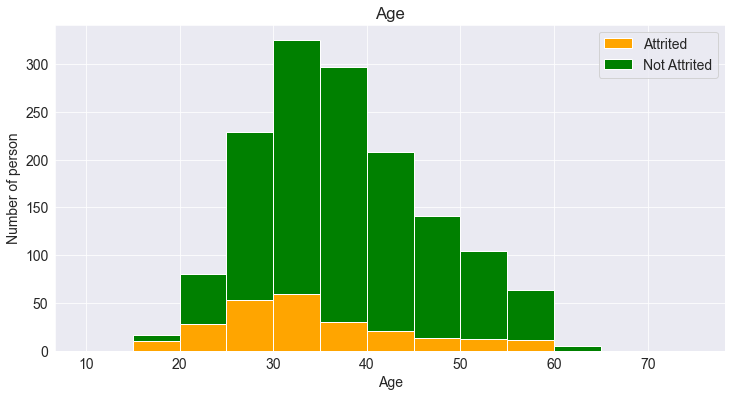

In [56]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Number of person')

plt.hist([Attr_yes_df.Age,Attr_no_df.Age], bins=np.arange(10,80,5), color=['orange','green'],stacked=True);
plt.legend(['Attrited', 'Not Attrited']);

Created a heatmap to understand the correlation between all the numerical features. It shows:

> - Job Level and Monthly Income has strong correlation
> - Higher the performance rating, higher the salary hike.
> - Total Working years and YearsAtCompany are highly correlated.
> - Yearsatcompany and yearswithcurrent manager is highly correlated.
> - There is very low correlation between number of companies worked and total working years.

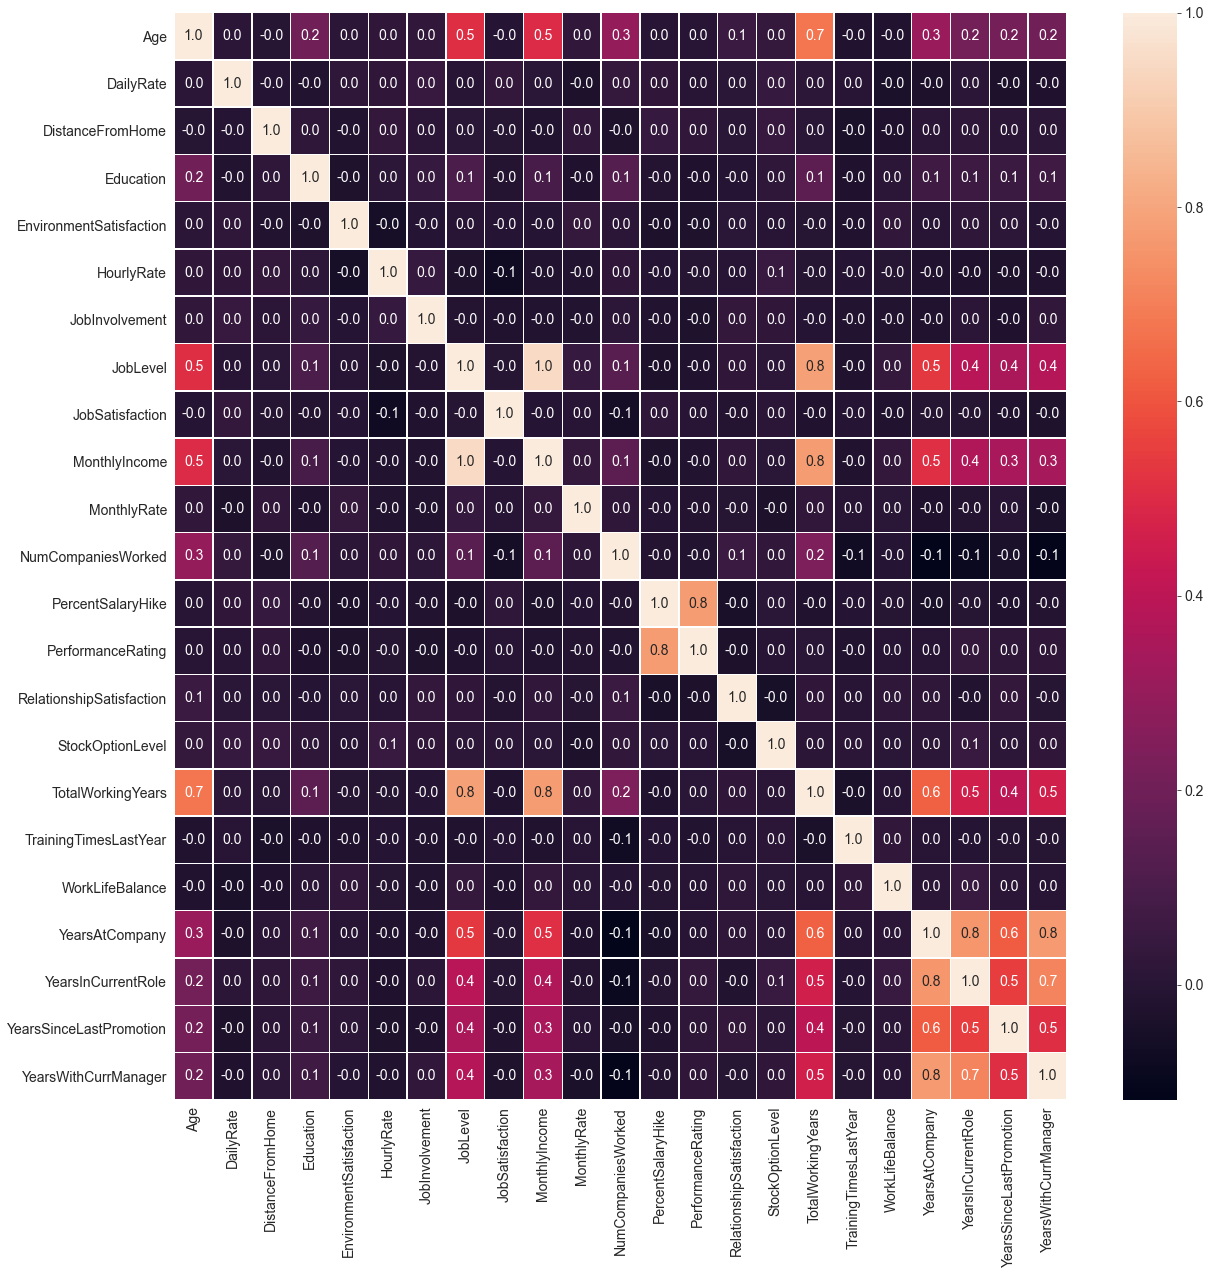

In [57]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(emp_new_df.corr(),annot=True,linewidth=.5,fmt='.1f')

Exploring the employees distribution based on marital status us

Text(0.5, 1.0, 'Marital Status')

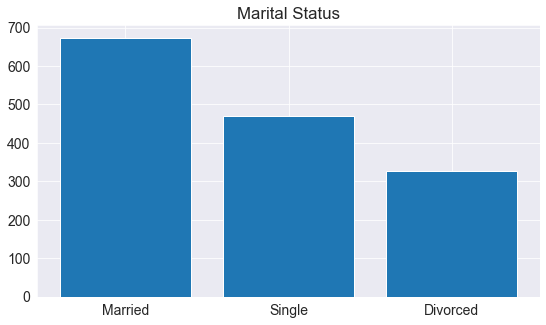

In [58]:
mar_stat=emp_new_df['MaritalStatus'].value_counts()
plt.bar(mar_stat.index,mar_stat)
plt.title('Marital Status')

## Asking and Answering Questions

Have come up with few questions to do my analysis around attrition reasons. I have also tried using all the learned concepts to acieve the same.

#### Q1: Which department and job role has seen most attrition?

In [59]:
Attr_yes_df=emp_df[emp_df['Attrition']=='Yes']
Attr_no_df=emp_df[emp_df['Attrition']=='No']

dept_count_yes=Attr_yes_df['EducationField'].value_counts()
dept_count_no=Attr_no_df['EducationField'].value_counts()
job_role_yes=Attr_yes_df['JobRole'].value_counts()
job_role_no=Attr_no_df['JobRole'].value_counts()

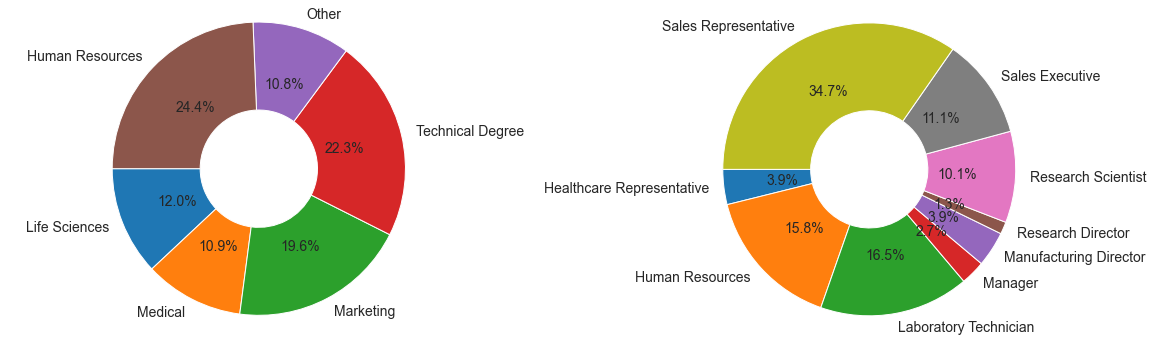

In [60]:
fig, axes = plt.subplots(1,2, figsize=(20, 6))

# Pie wedgeprops with width being the donut thickness
axes[0].pie((dept_count_yes*100/dept_count_no), wedgeprops=dict(width=0.6), labels=(dept_count_yes/dept_count_no).index,autopct='%1.1f%%', startangle=180);
axes[0].text(0., 0., '', horizontalalignment='center', verticalalignment='center')
axes[0].axis('equal')

#plt.show()

axes[1].pie((job_role_yes*100/job_role_no), wedgeprops=dict(width=0.6), labels=(job_role_yes/job_role_no).index,autopct='%1.1f%%', startangle=180);
axes[1].text(0., 0., '', horizontalalignment='center', verticalalignment='center')
axes[1].axis('equal')
plt.show()

I have displayed the rate of attrition across department and job role. As we can see,  Human Resources and Technical Degree had most attrition rate. While Sales representative job role was most impacted by attrition. Manager, Research Director and Manufacturing Director had comparatively lesser attrition rate. I have calculated attrition rate by dividing data from attrited employees upon non attrited employees.

#### Q2: What is the relation between gender wise job satisfaction for all the employees?.

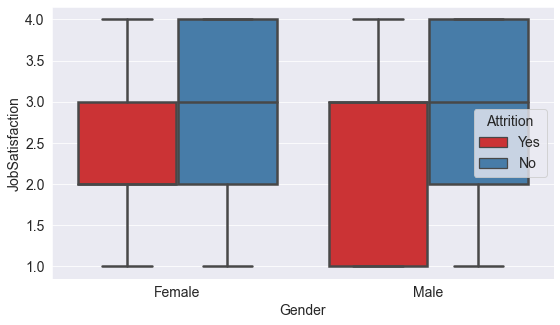

In [61]:
ax=sns.boxplot(x=emp_new_df["Gender"],y=emp_new_df['JobSatisfaction'],hue=emp_new_df['Attrition'],palette="Set1",linewidth=2.5)

For individuals who stayed in the organization,distribution of job satisfaction is same irrespective of gender. While amongst those who left, females had lower job satisfaction.

#### Q3: What is the average no of companies worked previously?

In [62]:
def genfunc(age2):
    gen=[]
    if (age2)<37:
        gen='Millenials'
    elif age2>=37 and age2<54:
        gen='Generation X'
    elif age2>=54 and age2<73:
        gen='Boomers'
    else:
        gen='Silent'
    return(gen)
emp_new_df['Generation']=emp_new_df['Age'].apply(genfunc)

In [63]:
gen_df=emp_new_df.groupby('Generation')['NumCompaniesWorked'].mean()
gen_df

Generation
Boomers         4.218391
Generation X    3.278632
Millenials      2.097744
Name: NumCompaniesWorked, dtype: float64

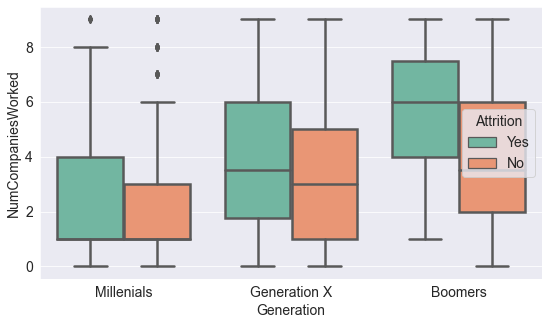

In [64]:
ax=sns.boxplot(x=emp_new_df["Generation"],y=emp_new_df['NumCompaniesWorked'],hue=emp_new_df['Attrition'],palette="Set2",linewidth=2.5,order=['Millenials','Generation X','Boomers'])

Created a column called generation based on age of employees. This was done to understand if there is a difference in behaviour of young versus old generation employees. It currently shows lesser number for millenials compared to the boomers as they obviously are younger. In future, I would be studying the attrition rate of the generation category to get a better picture.

#### Q4: Does income parity across department have an impact on attrition?

In [65]:
inc=Attr_yes_df.groupby(['Department'])['MonthlyIncome'].mean()

inc_att=Attr_no_df.groupby(['Department'])['MonthlyIncome'].mean()


Text(0.5, 1.0, 'Not Attrited Employees')

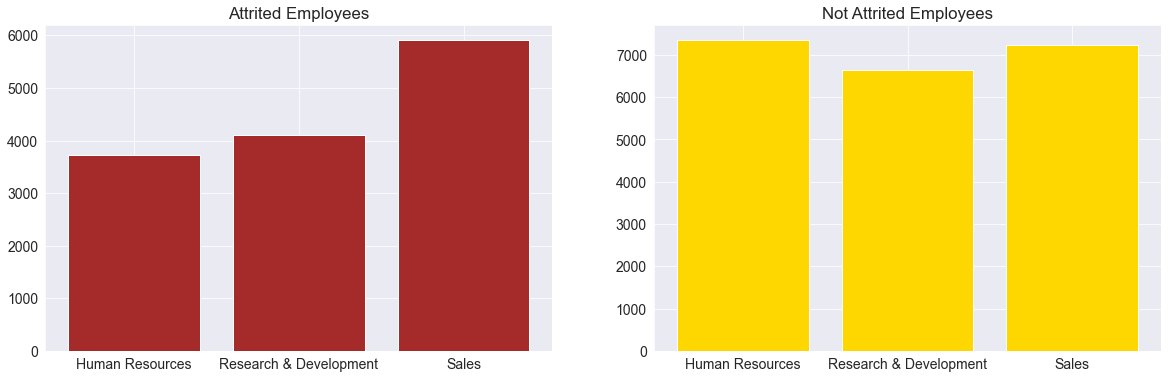

In [66]:
fig, axes = plt.subplots(1,2, figsize=(20, 6))
axes[0].bar(inc.index, inc, color='brown')
axes[0].set_title('Attrited Employees')
axes[1].bar(inc_att.index, inc_att, color='gold')
axes[1].set_title('Not Attrited Employees')


In [67]:
As we can see, attrited employess of the same departments have lesser monthly income than employees who haven't attrited. Human Resources department has a difference of almost double monthly pay.While, Sales department doesnt have much significant pay parity.

SyntaxError: invalid syntax (<ipython-input-67-17de9b1e2e19>, line 1)

#### Q5: Does promotion affect attrition?

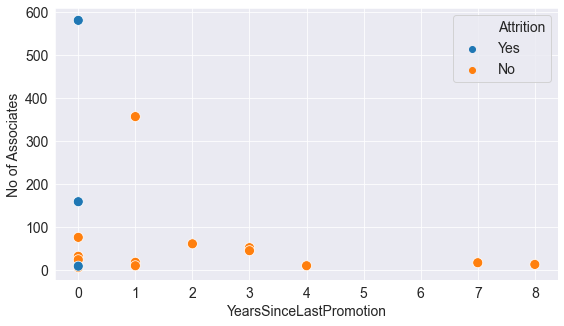

In [68]:
yearpromo_count_df=emp_df['YearsSinceLastPromotion'].value_counts()
sns.scatterplot(emp_new_df.YearsSinceLastPromotion, yearpromo_count_df, hue=emp_new_df.Attrition, s=100)
plt.xlabel("YearsSinceLastPromotion")
plt.ylabel("No of Associates");

As we can see in the above scatter plot, all the employees who attrited have got promotion in less than 1 year duration. While employees who haven't got promotion are still with the company. It shows the pattern that employees maybe wait in a company till they get promotion and start looking for opportunities ouside as soon as they get promoted. 

## Inferences and Conclusion

> - Correlation graph showed correlation between different features. It showed how performance rating & hike is highly correlated.
> - Sales Representative Job Role has the highest attrition rate.
> - Most employees leave job after getting promotion.
> - Employees  of same department who get attrited have lesser monthly income compared to those who did not get attrited
> -  Promotion impacts attrition rate: Employees who get promoted leaves sooner that those who didnt get promotion.


In [40]:
import json
f=open('Kaggle.json',"r")
data = json.loads(f.read())
data

{'username': 'chetnashahi', 'key': '9cd4e48bc55cea35a0b5d9c74dcda0ef'}